# Webscraping 
Collecting data directly from any website

# Installing Required packages

In [1]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### Restart and run all cells

In [2]:
import requests
url = "https://www.opindia.com/latest-news/?nocache"
response = requests.get(url)
response

<Response [200]>

### Proceed web scraping only if it shows 200 as response

### Response Code

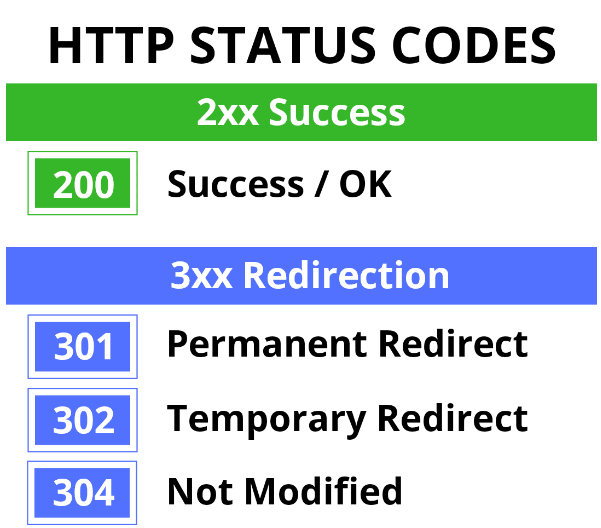

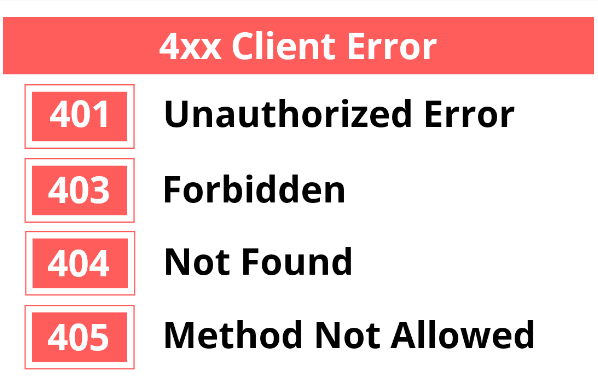

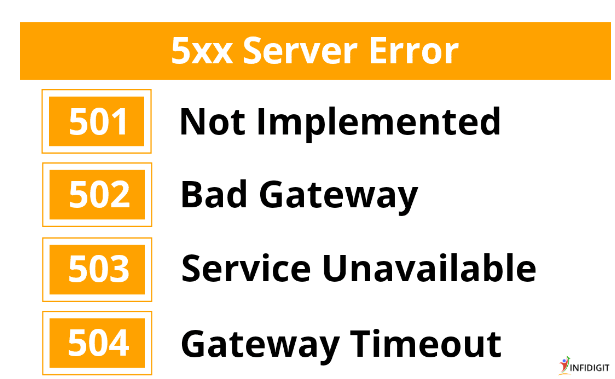

# Heading 1

## Heading 2

### Heading 3

<h1>Heading 1</h>

<h2>Heading 2</h>

<h3>Heading 3</h>

<h4>Plain Text</h>

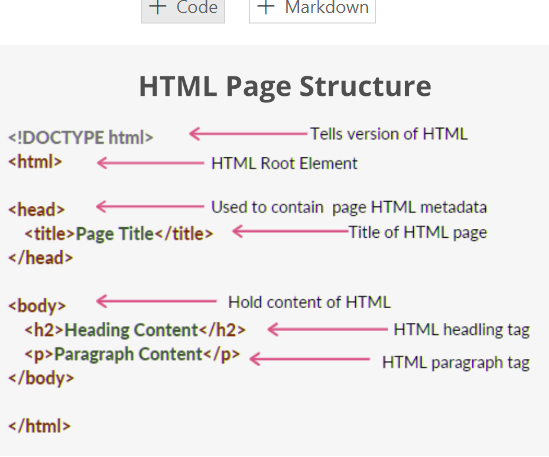

### Getting html code for data

In [3]:
data = response.content

### Create beatuiful soup for scrapping data

In [4]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(data)

### Get news heading and news links

In [5]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/" rel="bookmark" title="Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign ">Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign </a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/hamid-ansari-used-to-help-gangster-mukhtar-despite-being-vice-president-bjp-mla-sushil-singh/" rel="bookmark" title="‘Hamid Ansari used to help gangster Mukhtar Ansari despite being the Vice President’: BJP MLA Sushil Singh">‘Hamid Ansari used to help gangster Mukhtar Ansari despite being the Vice President’: BJP MLA Sushil Singh</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/33-parliamentarians-suspended-from-lok-sabha-winter-session-misconduct/" rel="bookmark"

In [6]:
headings[0]

<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/" rel="bookmark" title="Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign ">Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign </a></h3>

In [7]:
headings[0].text

'Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign\xa0'

In [8]:
headings[0].find('a')

<a href="https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/" rel="bookmark" title="Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign ">Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign </a>

In [9]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/'

In [10]:
len(headings)

104

### Create a function to get news headings and links

In [11]:
def get_news_headings_links(url):
    import requests
    response = requests.get(url)
    data = response.content
    from bs4 import BeautifulSoup
    bs = BeautifulSoup(data)
    # Get news headings and links
    headings = bs.find_all('h3', class_="entry-title td-module-title")
    title = []
    links = []
    for i in headings:
        h = i.text
        title.append(h)
        l = i.find('a').get('href')
        links.append(l)
    return title, links

In [12]:
url

'https://www.opindia.com/latest-news/?nocache'

In [13]:
titles, links = get_news_headings_links(url)

In [14]:
titles[0:5]

['Congress kickstarts ‘Donate for Desh’ campaign, forgets to register the domains for the campaign\xa0',
 '‘Hamid Ansari used to help gangster Mukhtar Ansari despite being the Vice President’: BJP MLA Sushil Singh',
 'Adhir Ranjan, A Raja and more: Lok Sabha suspends 33 more MPs for misconduct during Winter Session, total suspension stands at 46',
 'Half of Bengal’s population will one day speak Urdu: Old video of Kolkata Mayor thanking Mamata Banerjee for making it second language goes viral',
 'Ashok Gehlot ruined Rajasthan’s economy, left a debt of Rs 5.37 lakh crore on the state, failed to boost GDP']

In [15]:
links[0:5]

['https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/',
 'https://www.opindia.com/2023/12/hamid-ansari-used-to-help-gangster-mukhtar-despite-being-vice-president-bjp-mla-sushil-singh/',
 'https://www.opindia.com/2023/12/33-parliamentarians-suspended-from-lok-sabha-winter-session-misconduct/',
 'https://www.opindia.com/2023/12/old-video-kolkata-mayor-firhad-hakim-urdu-propehcy-half-population-west-bengal-viral/',
 'https://www.opindia.com/2023/12/ashok-gehlot-rajasthans-economy-left-a-debt-of-rs-5-37-lakh-crore-on-the-state-failed-to-boost-gdp/']

In [16]:
url2 = links[0]
url2

'https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/'

In [17]:
response2 = requests.get(url2)
response2

<Response [200]>

In [18]:
data2 = response2.content
bs2 = BeautifulSoup(data2)

In [19]:
date = bs2.find('time', class_="entry-date updated td-module-date")
date

<time class="entry-date updated td-module-date" datetime="2023-12-18T20:21:53+05:30">18 December, 2023 </time>

In [20]:
date.text

'18 December, 2023 '

In [21]:
content_tags = bs2.find_all('p')
content_tags

[<p>While Congress launched its crowdfunding campaign 'Donate for Desh' without registering a domain name for the same, BJP and OpIndia acquired domain names that redirected </p>,
 <p>Congress recently announced its <a href="https://www.opindia.com/2023/12/congress-announces-crowdfunding-campaign-after-crores-recovered-from-congress-mp-dhiraj-sahu-i-t-raids/" rel="noreferrer noopener" target="_blank">crowdfunding</a> campaign ‘Donate for Desh’ to raise funds from the general public following reports of massive seizures of unaccounted cash from Congress leaders. Days after the announcement, Congress President Mallikarjun Kharge on 18th December <a href="https://www.youtube.com/watch?v=H0M3pNOKoQI">launched</a> the campaign in New Delhi. </p>,
 <p>Incidentally, the links for the Congress crowdfunding campaign land the donors on BJP’s donation page. It has come to light that the funds and donations through the Congress party’s campaign are adding to the Bharatiya Janata Party’s coffers. A

In [22]:
content_tags[0].text

"While Congress launched its crowdfunding campaign 'Donate for Desh' without registering a domain name for the same, BJP and OpIndia acquired domain names that redirected "

In [23]:
article = ""
for i in content_tags:
    article = article + i.text

In [24]:
print(article)

While Congress launched its crowdfunding campaign 'Donate for Desh' without registering a domain name for the same, BJP and OpIndia acquired domain names that redirected Congress recently announced its crowdfunding campaign ‘Donate for Desh’ to raise funds from the general public following reports of massive seizures of unaccounted cash from Congress leaders. Days after the announcement, Congress President Mallikarjun Kharge on 18th December launched the campaign in New Delhi. Incidentally, the links for the Congress crowdfunding campaign land the donors on BJP’s donation page. It has come to light that the funds and donations through the Congress party’s campaign are adding to the Bharatiya Janata Party’s coffers. As per reports, the grand old party kicked off the crowdfunding campaign without registering the related domain names. Reports add that the BJP secured the website domains after Congress failed to register the relevant domains for the donation websites promoted in its fundra

### Getting news article time and article for a specific link

In [25]:
def get_news_date_article(url2):    
    response2 = requests.get(url2)
    data2 = response2.content
    bs2 = BeautifulSoup(data2)
    # Getting Date
    date_tag = bs2.find('time', class_="entry-date updated td-module-date")
    date = date_tag.text
    # Get article
    content_tags = bs2.find_all('p')
    article = ""
    for i in content_tags:
        article = article + i.text
    return date, article


In [26]:
def get_all_news_dates_articles(links):
    news = []
    dates = []
    for i in links:
        date, article = get_news_date_article(i)
        dates.append(date)
        news.append(article)
    return dates, news

In [27]:
url2

'https://www.opindia.com/2023/12/congress-kickstarts-donate-for-desh-campaign-forgets-to-register-the-domains-for-the-campaign/'

In [28]:
date, article = get_news_date_article(url2)

In [29]:
date, article = get_news_date_article(url2)

In [30]:
date

'18 December, 2023 '

In [31]:
article

'While Congress launched its crowdfunding campaign \'Donate for Desh\' without registering a domain name for the same, BJP and OpIndia acquired domain names that redirected Congress recently announced its crowdfunding campaign ‘Donate for Desh’ to raise funds from the general public following reports of massive seizures of unaccounted cash from Congress leaders. Days after the announcement, Congress President Mallikarjun Kharge on 18th December launched the campaign in New Delhi.\xa0Incidentally, the links for the Congress crowdfunding campaign land the donors on BJP’s donation page. It has come to light that the funds and donations through the Congress party’s campaign are adding to the Bharatiya Janata Party’s coffers. As per reports, the grand old party kicked off the crowdfunding campaign without registering the related domain names. Reports add that the BJP secured the website domains after Congress failed to register the relevant domains for the donation websites promoted in its 

### Creating a final function to save all news details in a dataframe

In [32]:
def get_news_dataframe(url):
    # Get news headings and links
    headings, links = get_news_headings_links(url)
    # Get the news and dates for each link
    dates, news  = get_all_news_dates_articles(links)
    dct = {'Date':dates, 
           'Heading':headings,
           'Link': links,
           'Article':news}
    # Save above in dataframe
    import pandas as pd
    df = pd.DataFrame(dct)
    return df

In [33]:
url

'https://www.opindia.com/latest-news/?nocache'

In [34]:
df_news = get_news_dataframe(url)

In [35]:
df_news

,Date,Heading,Link,Article
0,"18 December, 2023",Congress kickstarts ‘Donate for Desh’ campaign...,https://www.opindia.com/2023/12/congress-kicks...,While Congress launched its crowdfunding campa...
1,"18 December, 2023",‘Hamid Ansari used to help gangster Mukhtar An...,https://www.opindia.com/2023/12/hamid-ansari-u...,Sushil Singh further added that Mukhtar Ansari...
2,"18 December, 2023","Adhir Ranjan, A Raja and more: Lok Sabha suspe...",https://www.opindia.com/2023/12/33-parliamenta...,The House earlier suspended 13 members for dis...
3,"18 December, 2023",Half of Bengal’s population will one day speak...,https://www.opindia.com/2023/12/old-video-kolk...,"In February 2012, Mamata Banerjee made Urdu th..."
4,"18 December, 2023","Ashok Gehlot ruined Rajasthan’s economy, left ...",https://www.opindia.com/2023/12/ashok-gehlot-r...,Rajasthan is presently drowning in debt. A rep...
...,...,...,...,...
99,"17 December, 2023",Uttarakhand: Woman files for divorce 2 years a...,https://www.opindia.com/2023/12/uttarakhand-ma...,The High Court has decided that Sarita's stand...
100,"17 December, 2023","‘Modi ki guarantee, India will be among the to...",https://www.opindia.com/2023/12/pm-modi-guaran...,Surat diamond industry already employed 8 lak...
101,"17 December, 2023","Eyes gouged out, genitals mutilated, tongue ch...",https://www.opindia.com/2023/12/bihar-pujari-s...,"After the victim's mutilated body was found, t..."
102,"17 December, 2023",20-year-old Dalit woman gang-raped by two driv...,https://www.opindia.com/2023/12/dalit-woman-ga...,The woman was told to sit in the cabin because...


In [36]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     104 non-null    object
 1   Heading  104 non-null    object
 2   Link     104 non-null    object
 3   Article  104 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


### Save all above in news.csv

In [37]:
df_news.to_csv('News.csv', index=False)